In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,r2_score

# Importing the Data

In [2]:
train_data = pd.read_csv("train_data.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])

In [3]:
test_data = pd.read_csv("test_data.txt",sep=":::",names=['ID','TITLE','GENRE','DESCRIPTION'])

In [4]:
test_data_solution = pd.read_csv("test_data_solution.txt",sep=':::',names=['ID','GENRE','DESCRIPTION'])

In [5]:
display(train_data.head())
print(train_data.shape)
display(test_data.head())
print(test_data.shape)
display(test_data_solution.head())
print(test_data_solution.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


,ID,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 3)


In [6]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


None

In [7]:
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


None

In [8]:
display(test_data_solution.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  object
 1   GENRE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

In [9]:
test_data_solution.isnull().sum()

ID             0
GENRE          0
DESCRIPTION    0
dtype: int64

In [10]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [11]:
test_data_solution.isnull().sum()

ID             0
GENRE          0
DESCRIPTION    0
dtype: int64

# Visualizing Genre Distribution with Countplot

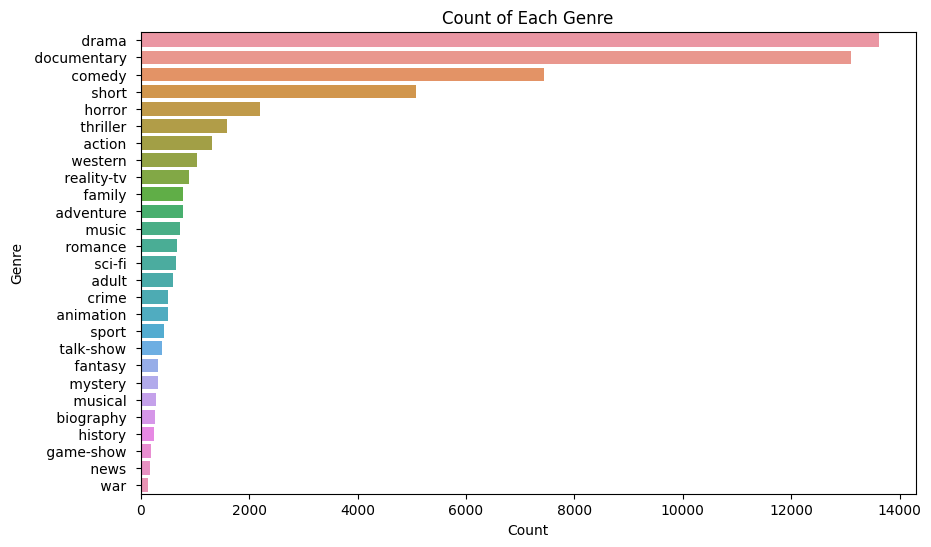

In [12]:

plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index)
plt.title('Count of Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Visualizing Top 10 Most Frequent Movies by Title

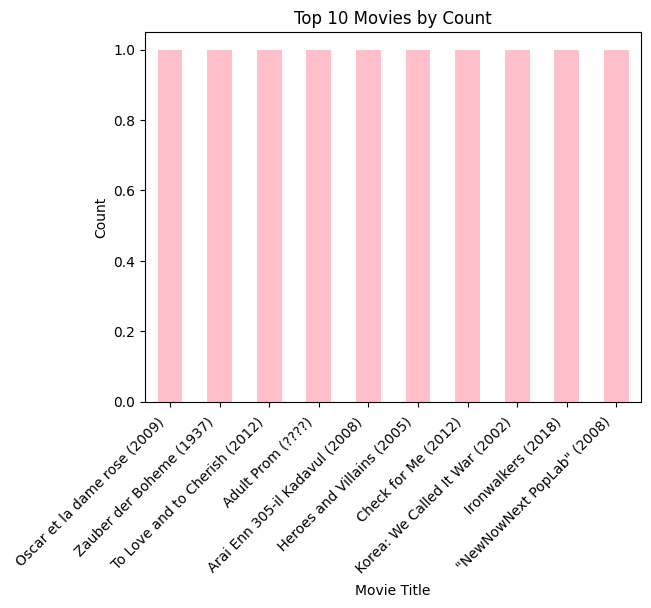

In [13]:
top_10_movies = train_data['TITLE'].value_counts().head(10)
top_10_movies.plot(kind='bar', color='pink')
plt.title('Top 10 Movies by Count')
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



# Visualizing Top 10 Most Frequent Genres by Count

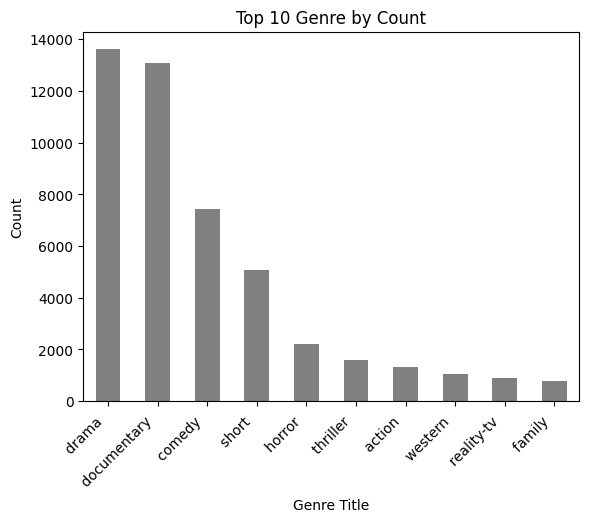

In [14]:
top_10_movies = train_data['GENRE'].value_counts().head(10)
top_10_movies.plot(kind='bar', color='gray')
plt.title('Top 10 Genre by Count')
plt.xlabel('Genre Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
train_data['DESCRIPTION'].fillna('',inplace =True)
test_data['DESCRIPTION'].fillna('',inplace = True)

# Encoding Genre Labels with LabelEncoder

In [29]:
lb = LabelEncoder()
train_data['GENRE'] = lb.fit_transform(train_data['GENRE'])

# Transforming Movie Descriptions with TF-IDF Vectorizer

In [34]:
tfid = TfidfVectorizer(max_features=100000)

In [35]:
x_train_tfid = tfid.fit_transform(train_data['DESCRIPTION'])
x_test_tfid = tfid.transform(test_data['DESCRIPTION'])

In [36]:
x = x_train_tfid
y = train_data['GENRE']

# Splitting Data into Training and Testing Sets

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Training and Evaluating Multinomial Naive Bayes Model

In [56]:
navie_model = MultinomialNB()

In [40]:
navie_model.fit(x_train,y_train)

np_prediction=navie_model.predict(x_test)
np_prediction

print(classification_report(y_test,np_prediction))

array([8, 8, 8, ..., 8, 8, 8])

In [43]:
print(confusion_matrix(y_test,np_prediction))

[[   0    0    0    0    0    0    0   59  204    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   10  102    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   40   98    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   38   66    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   39   20    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0   57    0  239 1147    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    9   98    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    

In [44]:
print("accuracy_score:",accuracy_score(y_test,np_prediction))

accuracy_score: 0.4460942543576501


In [45]:
print("r2_score:",r2_score(y_test,np_prediction))

r2_score: -0.16664235106232161


# Training and Evaluating Logistic Regression Model

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
lg_predict = logistic_model.predict(x_test)
print(classification_report(y_test,lg_predict))

              precision    recall  f1-score   support

           0       0.62      0.23      0.34       263
           1       0.92      0.20      0.32       112
           2       0.46      0.12      0.18       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.54      0.59      0.56      1443
           6       1.00      0.01      0.02       107
           7       0.66      0.88      0.75      2659
           8       0.54      0.81      0.65      2697
           9       0.57      0.05      0.10       150
          10       0.00      0.00      0.00        74
          11       1.00      0.38      0.55        40
          12       0.00      0.00      0.00        45
          13       0.66      0.58      0.62       431
          14       0.64      0.44      0.52       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

In [47]:
print("accuracy_score:",accuracy_score(y_test,lg_predict))
print("r2_score:",r2_score(y_test,lg_predict))

accuracy_score: 0.590150327400166
r2_score: 0.002781988514417133


# Training and Evaluating Linear Support Vector Classifier (SVC)

In [48]:
svc_model = LinearSVC()
svc_model.fit(x_train,y_train)
svc_prediction = svc_model.predict(x_test)
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       263
           1       0.80      0.44      0.57       112
           2       0.46      0.23      0.31       139
           3       0.47      0.17      0.25       104
           4       0.00      0.00      0.00        61
           5       0.54      0.59      0.56      1443
           6       0.23      0.03      0.05       107
           7       0.69      0.83      0.76      2659
           8       0.57      0.74      0.64      2697
           9       0.39      0.16      0.23       150
          10       0.11      0.01      0.02        74
          11       0.84      0.68      0.75        40
          12       1.00      0.02      0.04        45
          13       0.66      0.67      0.67       431
          14       0.60      0.58      0.59       144
          15       0.50      0.06      0.11        50
          16       0.43      0.05      0.10        56
          17       0.25    

In [49]:
print("accuracy_score:",accuracy_score(y_test,svc_prediction))
print("r2_score:",r2_score(y_test,svc_prediction))

accuracy_score: 0.5942082449506594
r2_score: -0.045716038433430306


In [50]:
model1 = {
    LinearSVC(): "LinearSVC",
    MultinomialNB(): "NaiveBayes",
    LogisticRegression(): "LogisticRegression"
}

# Selecting the Best Model Based on Accuracy

In [51]:
def best_model(models):
    best_accuracy = 0
    best_model_name = ""
    
    for model,name in models.items():
        model.fit(x_train,y_train)
        predictions = model.predict(x_test)
        
        accuracy = accuracy_score(y_test,predictions)
            
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_model_name = name
    return best_model_name, best_accuracy
            
best_model_name, best_accuracy = best_model(model1)
print(f"Best Model: {best_model_name} with accuracy {best_accuracy}")

Best Model: LinearSVC with accuracy 0.5942082449506594


# Predicting Movie Genre from Description Using SVC

In [52]:
def predict_movie(description):
    tfid1 = tfid.transform([description])
    predict_label = svc_model.predict(tfid1)
    return lb.inverse_transform(predict_label)

In [55]:
sample_input = 'police chases a criminal and shoot him'
print(predict_movie(sample_input))

[' crime ']
